In [1]:
import healpy as h
%pylab notebook
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from modules import return_rotated_kernel_healpix as rker
import numpy as np
import time

Populating the interactive namespace from numpy and matplotlib


In [96]:
nside=16 ; upnside=nside ; npix=h.nside2npix(upnside)
lmax=2*nside ; lmin=2
ell=arange(lmax+1)
fll=ell*(ell+1)/(2.*pi)

<IPython.core.display.Javascript object>


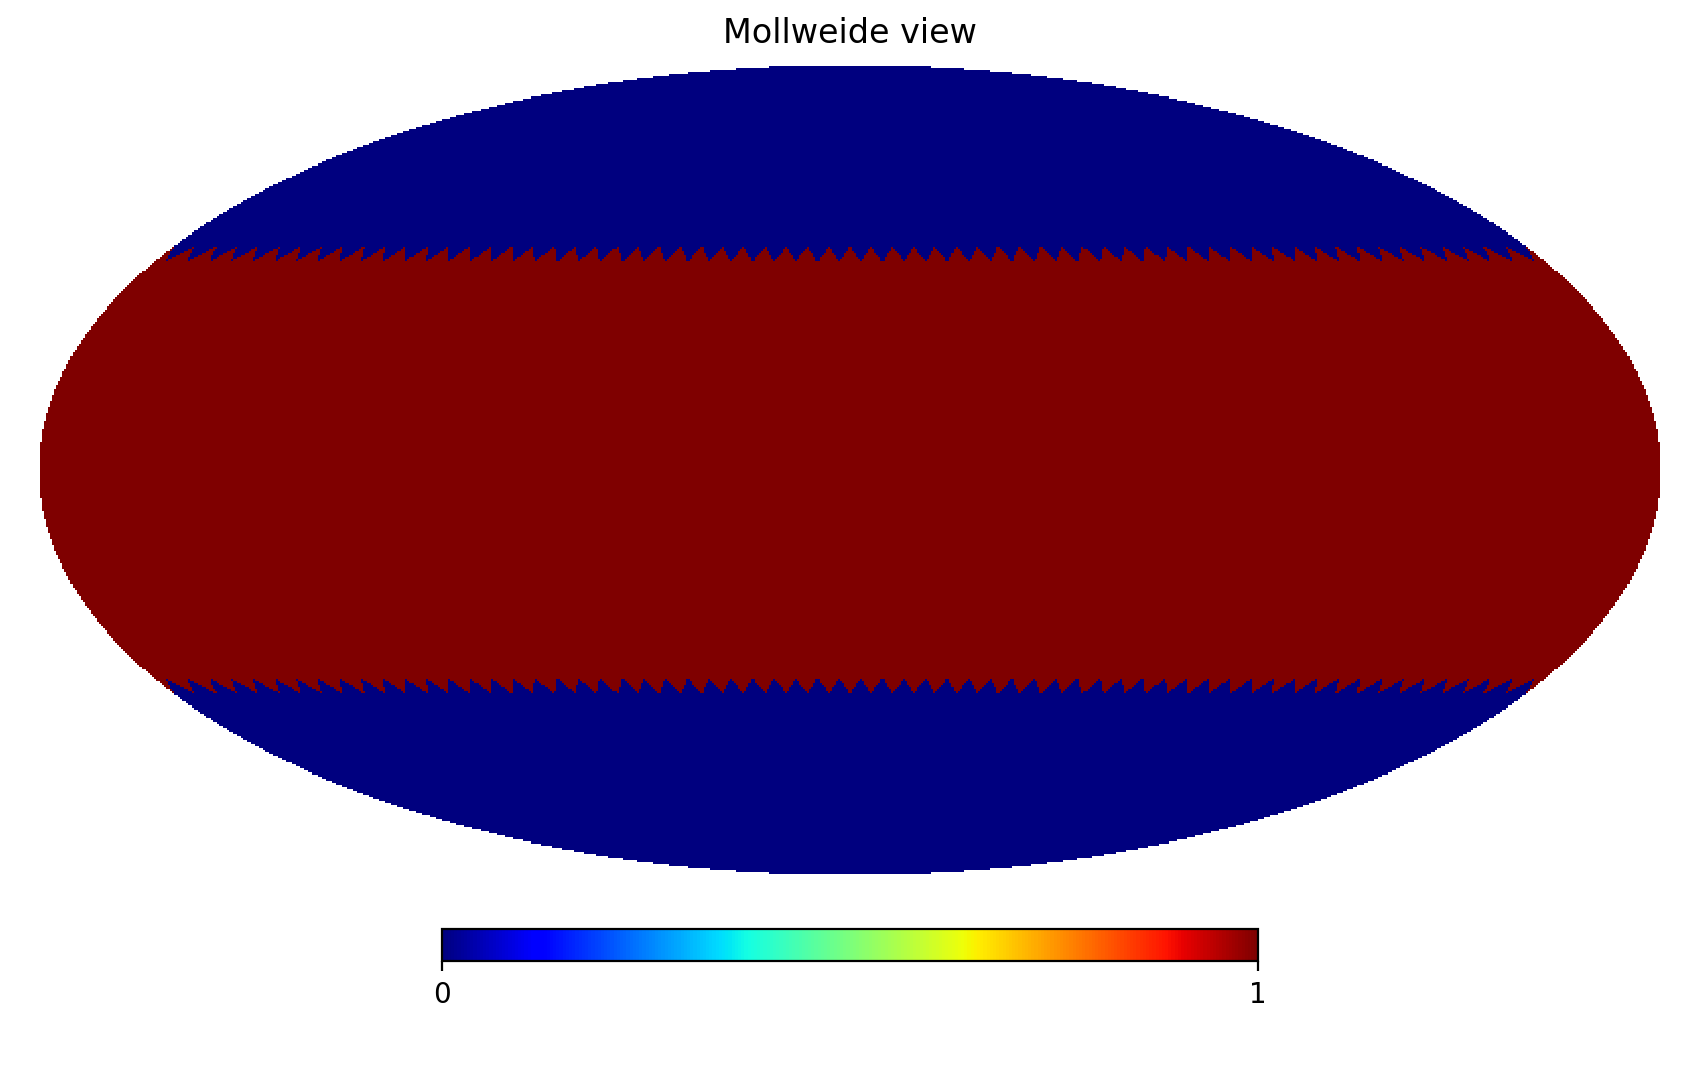

In [97]:
mask=np.ones(npix,float)
theta=h.pix2ang(nside,np.arange(npix))[0]*180./pi

mask[theta<50.]=0. ; mask[theta>130]=0.
h.mollview(mask)

In [124]:
cltemp=h.read_cl("../../data/planck_wp_highL_lensing_param.fits")
#cltemp=h.read_cl("../../data/cl_rem3.fits")
cl=[cltemp[0],cltemp[1],cltemp[2],cltemp[3]*0] # Reverse E and B spectra

random.seed(0) ; tqu=h.synfast(cl,nside,pol=True,new=True,verbose=False)
# Get teb maps from Healpix.
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; teb=h.alm2map(alm,upnside,pol=False,verbose=False)

# Get data power spectrum.
cld=h.alm2cl(alm)

# Get Q/U corresponding to E and B modes.
alm[2][:]=0.0 ; equ=h.alm2map(alm,nside=nside,pol=True,verbose=False)
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm[1][:]=0.0 ; bqu=h.alm2map(alm,nside=nside,pol=True,verbose=False)

fl=ones(3*nside+1,float) ; fl[:lmin+1]=0

<IPython.core.display.Javascript object>


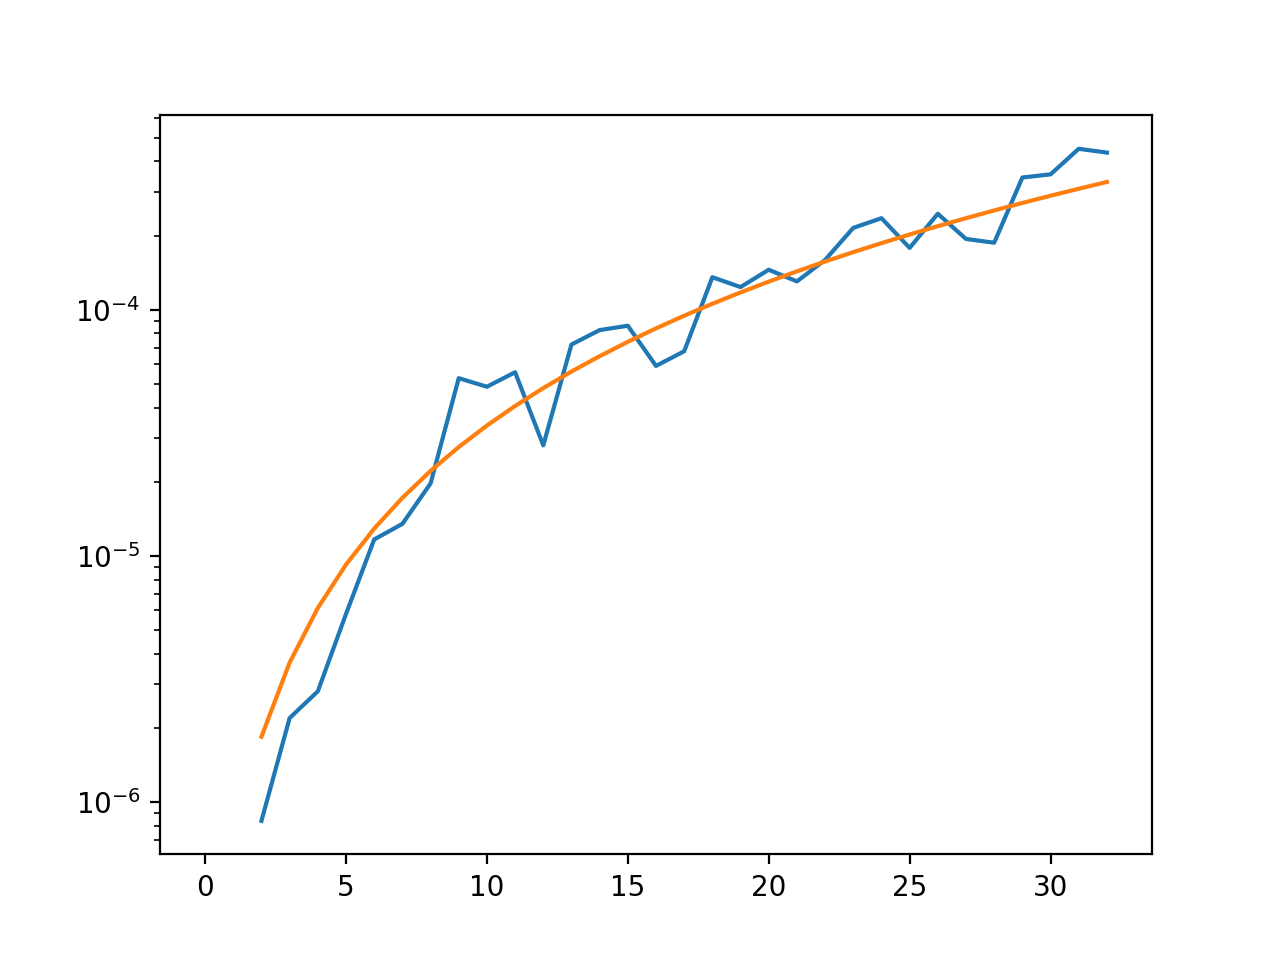

[]

In [125]:
figure()
plot(ell,fll*cld[2])
plot(ell,fll*cl[2][:lmax+1])
semilogy()

In [126]:
emap=np.zeros(npix,float)
bmap=np.zeros(npix,float)

for i in range(npix):
    mr,mi=rker.return_kernel_qu2eb(nside,lmax,i)
    emap[i]= -np.dot(mr,tqu[1]) + np.dot(mi,tqu[2])
    bmap[i]= - np.dot(mi,tqu[1])  - np.dot(mr,tqu[2])

In [127]:
cle=h.alm2cl(h.map2alm(emap*(mask),lmax=lmax))
clb=h.alm2cl(h.map2alm(bmap*(mask),lmax=lmax))
cld=h.alm2cl(h.map2alm(teb*(mask),lmax=lmax,pol=False))

<IPython.core.display.Javascript object>


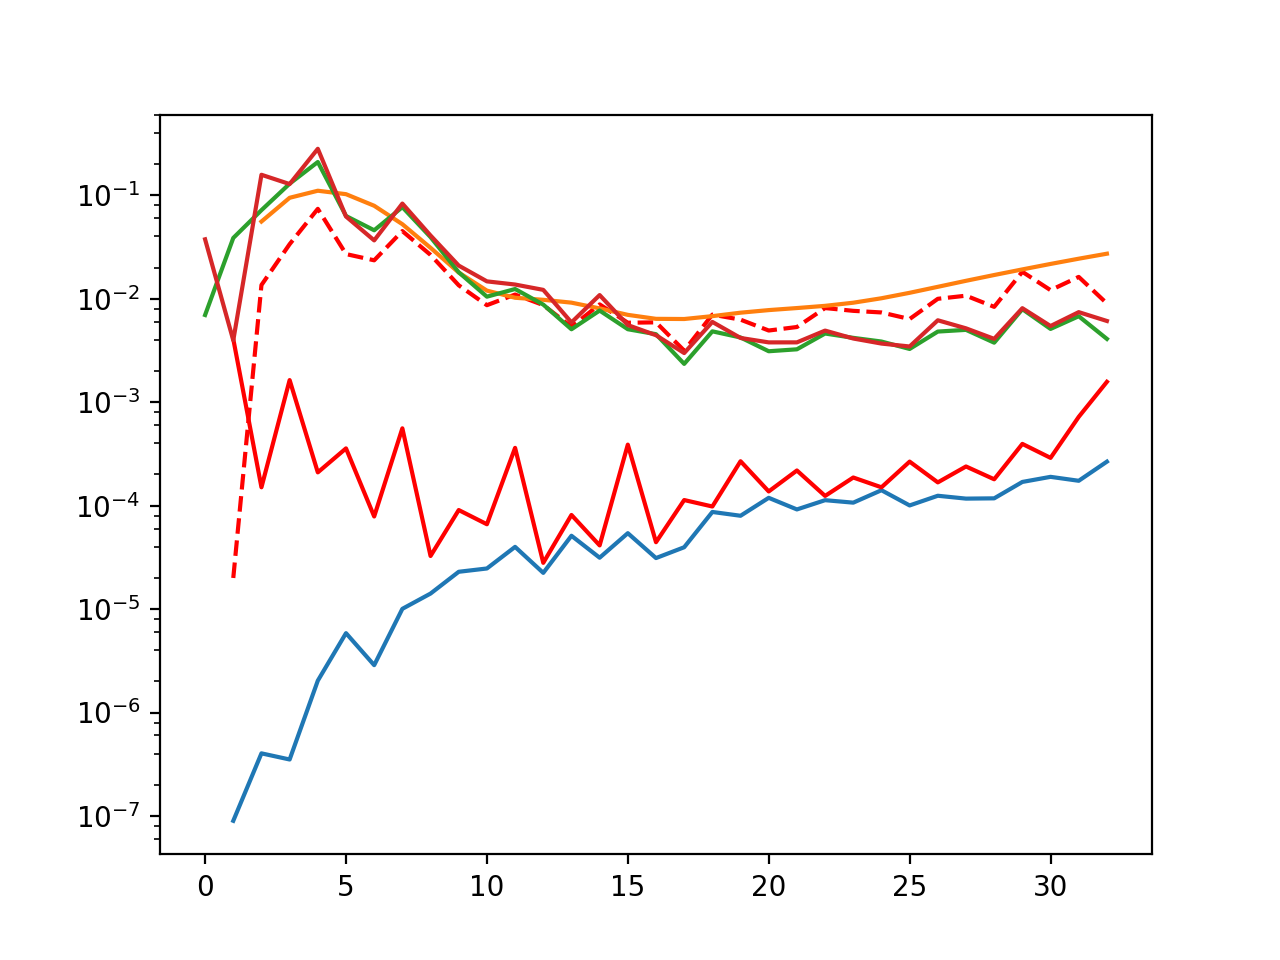

[]

In [131]:
figure()
plot(ell,fll*cld[2])
plot(ell,fll*cle,"r--")
plot(ell,fll*clb,"r-")


plot(ell,fll*cl[1][:lmax+1])
semilogy()

<IPython.core.display.Javascript object>


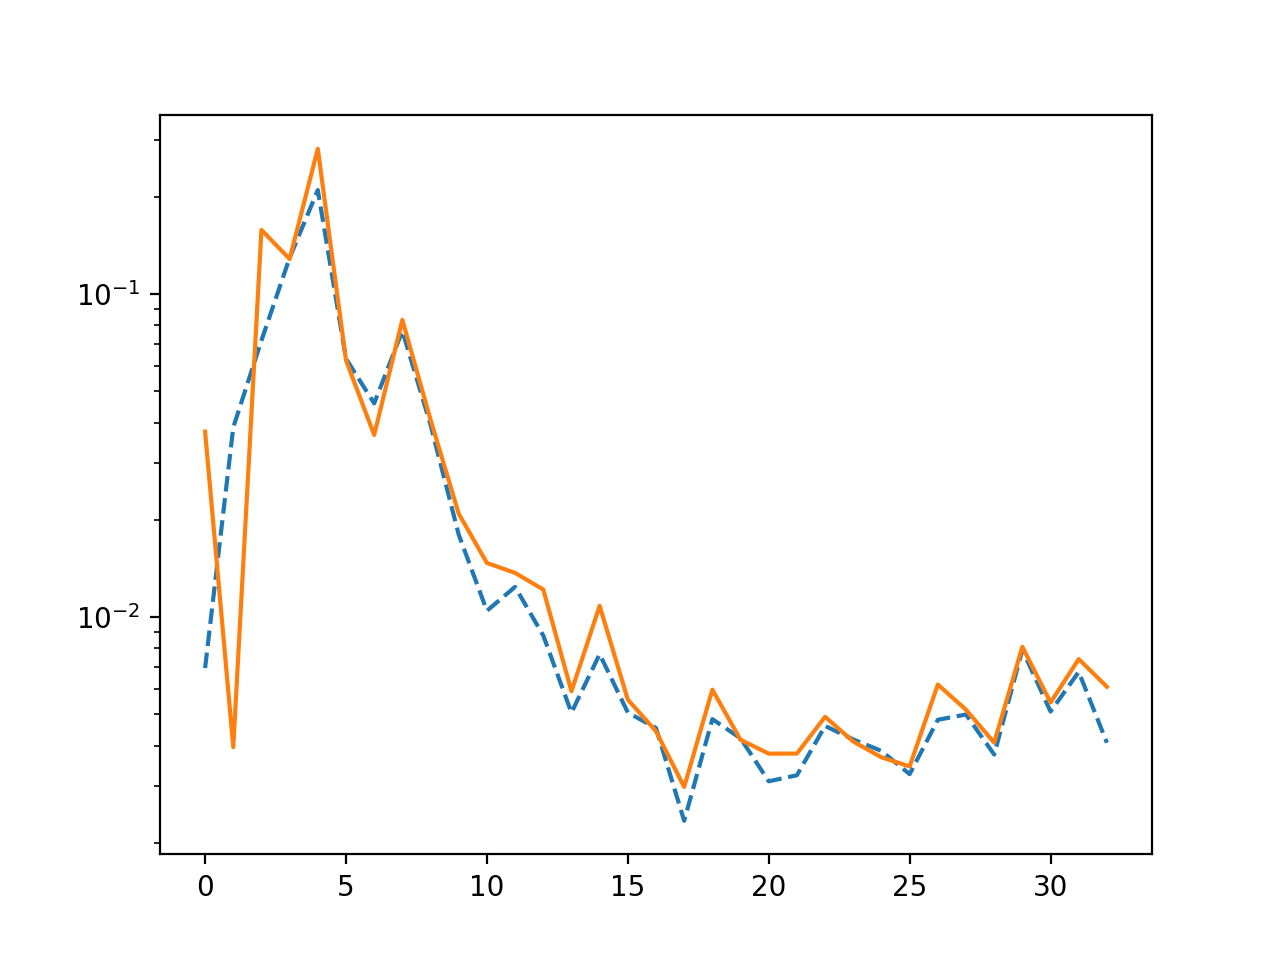

[]

In [135]:
figure()
plot(ell,(2.*ell+1)*(cle+clb),"--")
plot(ell,(2.*ell+1)*(cld[1]+cld[2]))
semilogy()

In [129]:
cldiffe=h.alm2cl(h.map2alm(emap-teb[1],lmax=lmax))
cldiffb=h.alm2cl(h.map2alm(bmap-teb[2],lmax=lmax))

<IPython.core.display.Javascript object>


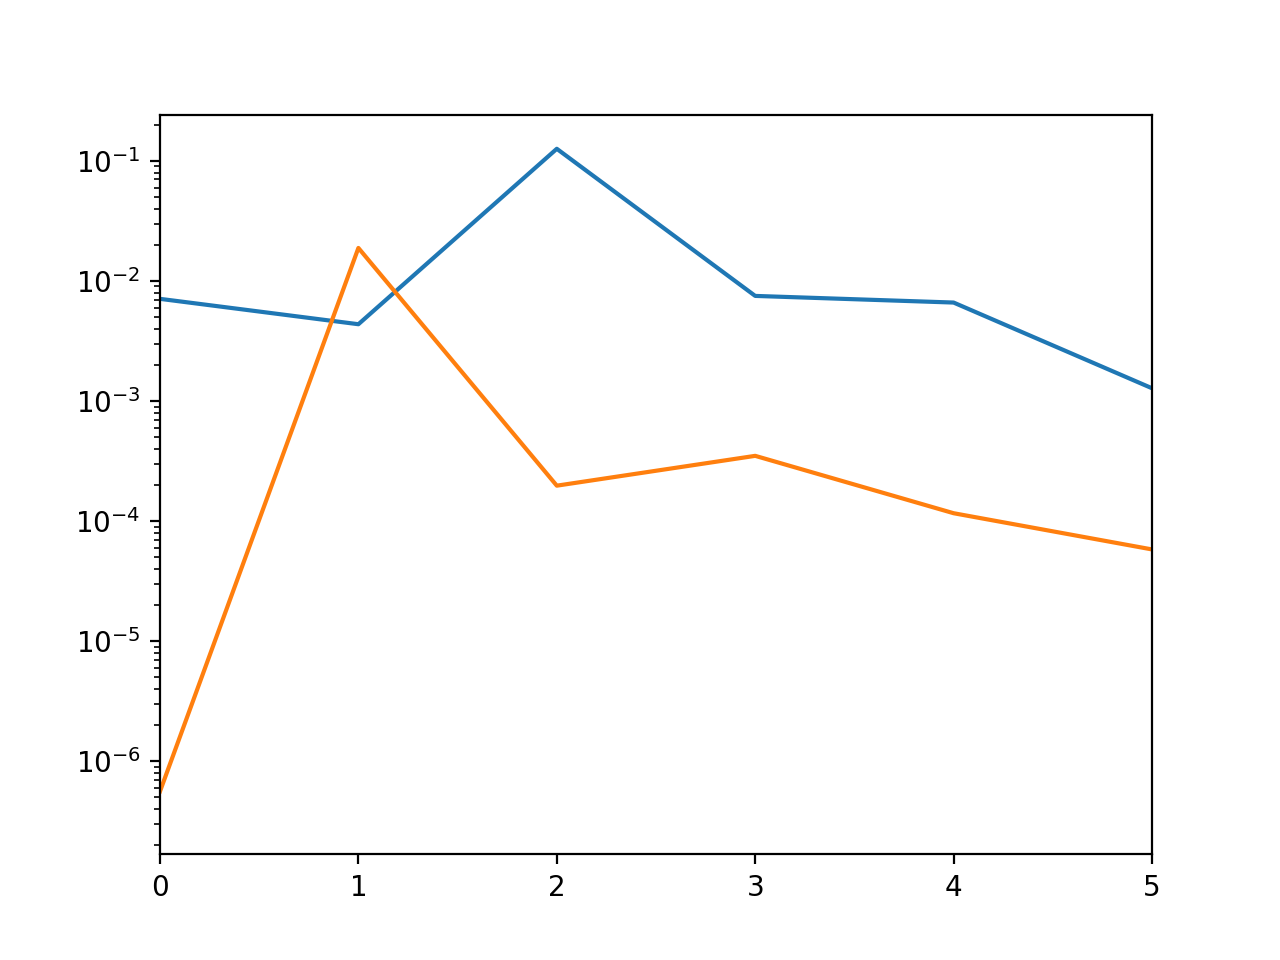

(0, 5)

In [130]:
figure()
plot(ell,cldiffe)
plot(ell,cldiffb)
semilogy()
xlim(0,5)